# Peer-graded Assignment: Prediction of Life Expectancy using Regression

For this course project a free data set from Kaggle website was chosen. The source of this data set is the Global Health Observatory (GHO) data repository under World Health Organization (WHO) and is used for the statistical analysis on factors influencing life expectancy, but in this assignment my main objective will be prediction of life expectancy based on immunization factors, mortality factors, economic factors, social
factors and other health related factors as well.\
In this analysis life expectancy at birth will be used as an outcome variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('data\Life Expectancy Data.csv')
df_orig = pd.read_csv('data\Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df['Country'].value_counts().T

Bosnia and Herzegovina    16
Côte d'Ivoire             16
Belarus                   16
Denmark                   16
France                    16
                          ..
Dominica                   1
Marshall Islands           1
Monaco                     1
Nauru                      1
San Marino                 1
Name: Country, Length: 193, dtype: int64

In [4]:
df['Status'].value_counts().T

Developing    2426
Developed      512
Name: Status, dtype: int64

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
df.dtypes.value_counts()

float64    16
int64       4
object      2
dtype: int64

In [7]:
df_orig.shape

(2938, 22)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.isna().sum().sort_values()

Country                              0
Year                                 0
Status                               0
infant deaths                        0
percentage expenditure               0
Measles                              0
 HIV/AIDS                            0
under-five deaths                    0
Life expectancy                     10
Adult Mortality                     10
Polio                               19
Diphtheria                          19
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Schooling                          163
Income composition of resources    167
Alcohol                            194
Total expenditure                  226
GDP                                448
Hepatitis B                        553
Population                         652
dtype: int64

In [11]:
import seaborn as sns
#sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

## Data Cleansing 

In [12]:
df2 = df.copy()

Drop thease features due to a huge number of missing data

In [13]:
df2.drop(["Population","Hepatitis B", "GDP","Total expenditure"],axis = 1,inplace = True)

In [14]:
df2.isna().sum().sort_values()

Country                              0
 HIV/AIDS                            0
under-five deaths                    0
percentage expenditure               0
infant deaths                        0
Measles                              0
Status                               0
Year                                 0
Life expectancy                     10
Adult Mortality                     10
Polio                               19
Diphtheria                          19
 BMI                                34
 thinness  1-19 years               34
 thinness 5-9 years                 34
Schooling                          163
Income composition of resources    167
Alcohol                            194
dtype: int64

In [15]:
df3 = df2.copy()

#### Drop missing data

In [16]:
df3 = df3.dropna()

In [17]:
df3.isna().sum().sort_values()

Country                            0
 thinness 5-9 years                0
 thinness  1-19 years              0
 HIV/AIDS                          0
Diphtheria                         0
Polio                              0
under-five deaths                  0
 BMI                               0
Measles                            0
percentage expenditure             0
Alcohol                            0
infant deaths                      0
Adult Mortality                    0
Life expectancy                    0
Status                             0
Year                               0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
df3.shape

(2562, 18)

####  Merge small cathegories into 1

In [19]:
c_counts = df3.Country.value_counts()
other_c = list(c_counts[c_counts <= 8].index)
df3['Country'] = df3['Country'].replace(other_c, 'Other')

In [20]:
df3['Country'].value_counts().T

Albania        16
New Zealand    16
Norway         16
Singapore      16
Afghanistan    16
               ..
Maldives       15
Philippines    15
Cameroon       15
Timor-Leste    13
Montenegro      9
Name: Country, Length: 171, dtype: int64

In [21]:
df3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5


#### Dear with outliers in dependent variable Life expectancy

Text(0, 0.5, 'counts')

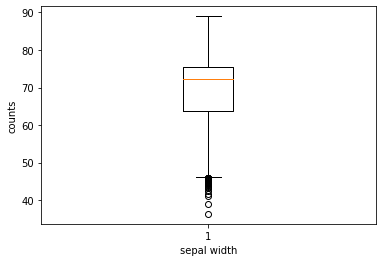

In [22]:
# boxplot of Life expectancy
plt.boxplot(df3[df3.columns[3]])
plt.xlabel('sepal width')
plt.ylabel('counts')

In [23]:
median = np.median(df3[df3.columns[3]])
upper_quartile = np.percentile(df3[df3.columns[3]], 75)
lower_quartile = np.percentile(df3[df3.columns[3]], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = df3[df3.columns[3]][df3[df3.columns[3]]<=upper_quartile+1.5*iqr].max()
lower_whisker = df3[df3.columns[3]][df3[df3.columns[3]]>=lower_quartile-1.5*iqr].min()

results = [upper_whisker,upper_quartile, median, lower_quartile,lower_whisker]
results

[89.0, 75.475, 72.2, 63.7, 46.2]

#### Remove outliers based on boxplot (all smaller then 46,2)

(array([  1.,   0.,   1.,   0.,   2.,   1.,   3.,   9.,  17.,  20.,  18.,
         28.,  27.,   7.,  54.,  44.,  42.,  43.,  51.,  49.,  72.,  65.,
         40.,  32.,  68.,  77.,  70.,  84.,  72., 102., 100., 109.,  19.,
        148., 204., 247., 203., 156., 107., 106., 126.,  51.,  80.,  73.,
         32.,  11.,  12.,  15.,   9.,  21.]),
 array([36.3  , 37.354, 38.408, 39.462, 40.516, 41.57 , 42.624, 43.678,
        44.732, 45.786, 46.84 , 47.894, 48.948, 50.002, 51.056, 52.11 ,
        53.164, 54.218, 55.272, 56.326, 57.38 , 58.434, 59.488, 60.542,
        61.596, 62.65 , 63.704, 64.758, 65.812, 66.866, 67.92 , 68.974,
        70.028, 71.082, 72.136, 73.19 , 74.244, 75.298, 76.352, 77.406,
        78.46 , 79.514, 80.568, 81.622, 82.676, 83.73 , 84.784, 85.838,
        86.892, 87.946, 89.   ]),
 <BarContainer object of 50 artists>)

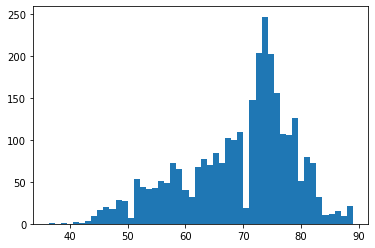

In [24]:
plt.hist(df2[df2.columns[3]], bins = 50) # not normal

In [25]:
len(df3.loc[df3.iloc[:,3] < lower_whisker,:])

41

In [26]:
df3.loc[df3.iloc[:,3] < lower_whisker,:]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
62,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,9046,15.8,159,41.0,38.0,2.1,1.7,1.7,0.391,5.1
63,Angola,2000,Developing,45.3,48.0,97,1.85,15.881493,2219,15.4,160,3.0,28.0,2.0,1.9,1.9,0.382,4.6
349,Botswana,2002,Developing,46.0,699.0,2,6.41,6.330007,7,31.1,4,97.0,97.0,34.6,11.4,11.3,0.558,11.9
522,Central African Republic,2005,Developing,45.9,511.0,17,1.50,40.922080,471,18.2,26,47.0,54.0,11.2,9.7,9.7,0.319,5.9
523,Central African Republic,2004,Developing,45.7,512.0,17,1.50,41.501117,1233,17.9,26,45.0,51.0,12.0,9.9,9.9,0.315,5.7
524,Central African Republic,2003,Developing,45.7,51.0,17,1.49,46.116194,652,17.5,26,44.0,47.0,12.8,1.0,1.1,0.316,5.6
525,Central African Republic,2002,Developing,45.6,58.0,17,1.47,31.594159,938,17.2,25,42.0,44.0,13.4,1.2,1.2,0.315,5.4
526,Central African Republic,2001,Developing,45.6,54.0,17,1.52,33.653157,2837,16.8,25,4.0,4.0,13.9,1.4,1.4,0.314,5.3
527,Central African Republic,2000,Developing,46.0,49.0,16,1.51,30.783827,3207,16.5,25,38.0,37.0,14.3,1.5,1.5,0.312,5.2
865,Eritrea,2000,Developing,45.3,593.0,7,0.83,0.735940,789,12.6,10,82.0,81.0,1.9,1.2,1.1,0.000,3.9


In [27]:
# drop small outliers
df4 = df3.copy()
df4 = df4.loc[df4.iloc[:,3] >= lower_whisker,:]
df4.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5


#### One-hot encoding

In [28]:
df4 = pd.get_dummies(df4, columns=['Status'], drop_first=True)
df4.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5,1


In [29]:
X = df4.drop(df4.columns[2], axis=1) 
X = X.drop(X.columns[0], axis=1)
X


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,263.0,62,0.01,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1,1
1,2014,271.0,64,0.01,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0.476,10.0,1
2,2013,268.0,66,0.01,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0.470,9.9,1
3,2012,272.0,69,0.01,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0.463,9.8,1
4,2011,275.0,71,0.01,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0.454,9.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2011,464.0,28,6.00,63.750530,0,29.9,42,93.0,93.0,13.3,6.8,6.7,0.452,10.1,1
2927,2010,527.0,29,5.21,53.308581,9696,29.4,44,89.0,89.0,15.7,7.1,7.0,0.436,10.0,1
2928,2009,587.0,30,4.64,1.040021,853,29.0,45,69.0,73.0,18.1,7.5,7.4,0.419,9.9,1
2929,2008,632.0,30,3.56,20.843429,0,28.6,46,75.0,75.0,20.5,7.8,7.8,0.421,9.7,1


In [30]:
X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Measles ', ' BMI ', 'under-five deaths ',
       'Polio', 'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [31]:
y = df4[df4.columns[2]]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
Name: Life expectancy , Length: 2521, dtype: float64

array([[<AxesSubplot:title={'center':' thinness 5-9 years'}>,
        <AxesSubplot:title={'center':' thinness  1-19 years'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':' BMI '}>],
       [<AxesSubplot:title={'center':'Income composition of resources'}>,
        <AxesSubplot:title={'center':'Schooling'}>]], dtype=object)

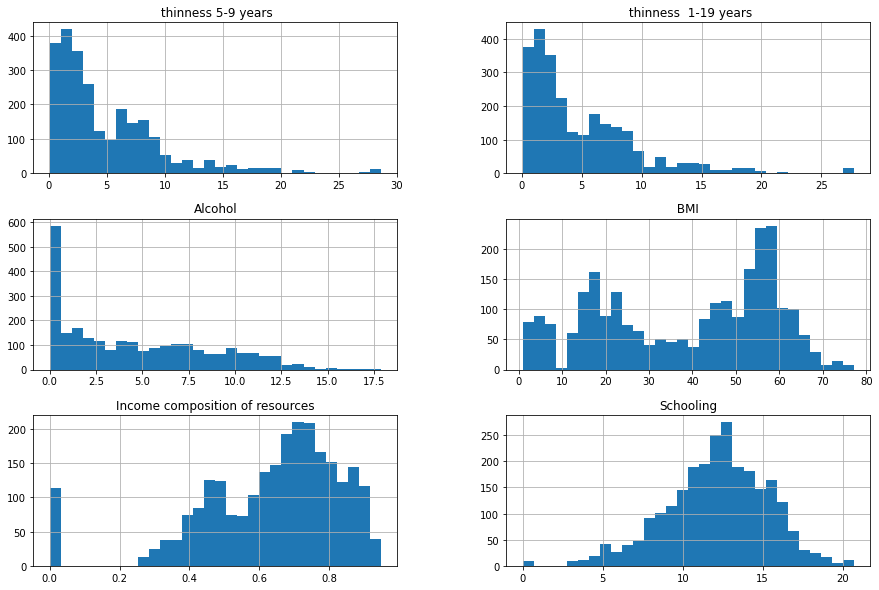

In [32]:
X[[' thinness 5-9 years',' thinness  1-19 years','Alcohol',' BMI ','Income composition of resources','Schooling']].hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'under-five deaths '}>],
       [<AxesSubplot:title={'center':'Measles '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria '}>],
       [<AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'Status_Developing'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>]],
      dtype=object)

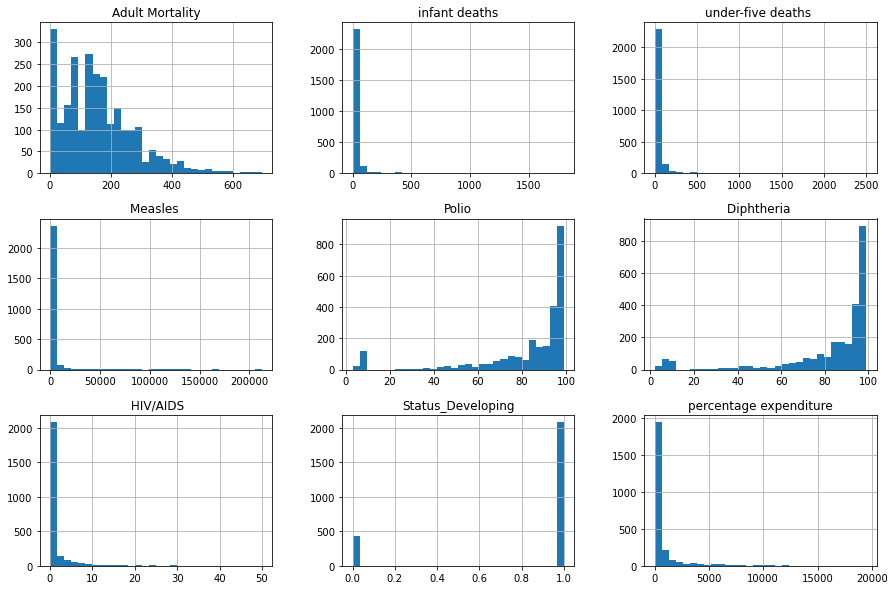

In [33]:
X[['Adult Mortality','infant deaths','under-five deaths ','Measles ','Polio','Diphtheria ',' HIV/AIDS','Status_Developing','percentage expenditure']].hist(bins=30, figsize=(15, 10))

In [34]:
#X[['Adult Mortality','infant deaths','under-five deaths ']].hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

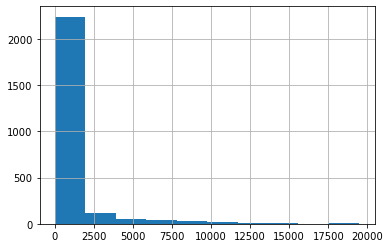

In [35]:
X['percentage expenditure'].hist()

In [37]:
df.loc[df['percentage expenditure']>= 15000,:]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1539,Luxembourg,2014,Developed,81.7,65.0,0,11.12,16255.16198,94.0,0,...,99.0,6.94,99.0,0.1,119172.74180,556319.0,1.0,0.9,0.892,13.9
1540,Luxembourg,2013,Developed,81.4,68.0,0,11.02,15515.75234,94.0,0,...,99.0,7.10,99.0,0.1,113751.85000,54336.0,0.9,0.9,0.892,13.9
1542,Luxembourg,2011,Developed,88.0,72.0,0,11.50,17028.52798,95.0,6,...,96.0,7.34,99.0,0.1,115761.57700,518347.0,0.9,0.9,0.894,13.9
1545,Luxembourg,2008,Developed,80.0,8.0,0,11.53,18961.34860,94.0,1,...,96.0,7.34,99.0,0.1,114293.84330,48865.0,0.9,0.9,0.887,13.5
1547,Luxembourg,2006,Developed,79.4,85.0,0,11.98,15345.49070,95.0,8,...,99.0,7.75,99.0,0.1,89739.71170,472637.0,0.9,0.9,0.880,13.5
1915,Norway,2010,Developed,81.0,66.0,0,6.59,15268.06445,NaN,3,...,93.0,9.26,93.0,0.1,87646.75346,4889252.0,0.7,0.7,0.936,17.4
2522,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
2523,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2524,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7
2525,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6


<AxesSubplot:>

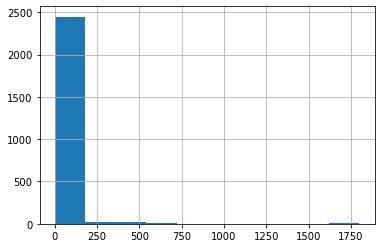

In [38]:
X['infant deaths'].hist()

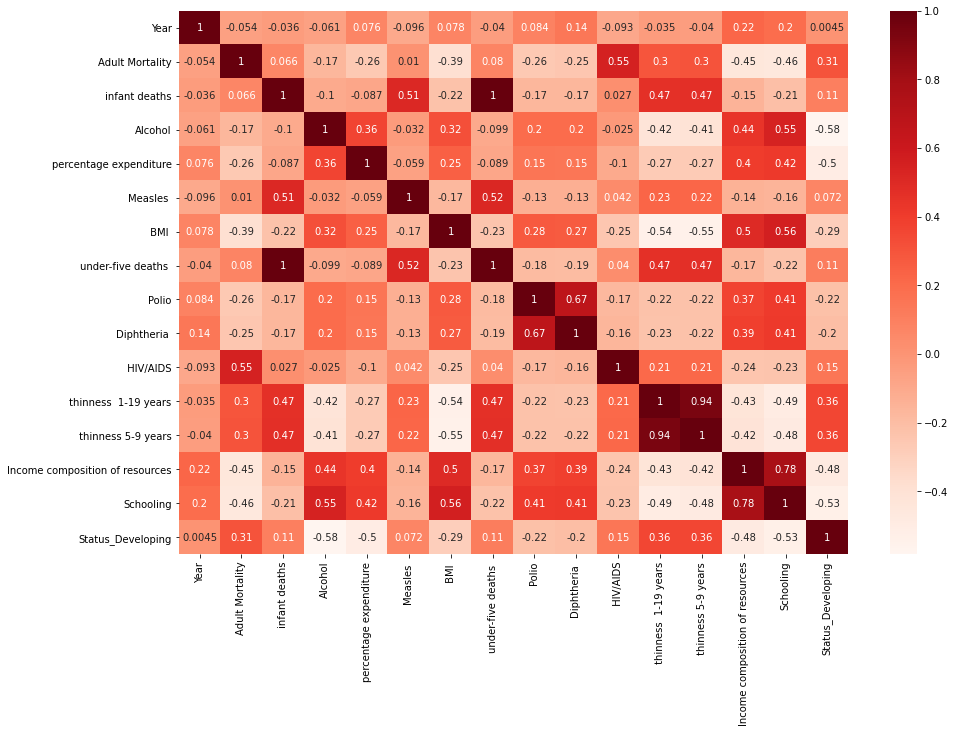

In [39]:
plt.figure(figsize =(15,10))#figsize =(12,10
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

#### Cross validation

In [40]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

#### Polynomyal features

In [41]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [43]:
X_pf.shape

(2521, 152)

In [44]:
pf3 = PolynomialFeatures(degree=3, include_bias=False)
X_pf3 = pf.fit_transform(X)

In [45]:
len(X_pf3)

2521

#### Normalization

In [47]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

#### gridsearch CV

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [51]:
alphasL =  [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
alphasR =  [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

In [52]:
las = Lasso(alpha=alphasL, max_iter=100000)
rid = Ridge(alpha=alphasR, max_iter=100000)
lr = LinearRegression()

# 1) Linear (vanilla) regression

In [53]:
estLRV = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("standard s", s),
        ("lin reg", lr)])

parLRV = {
    'polynomial_features__degree': [1]
}
gridLRV = GridSearchCV(estLRV, parLRV, cv=kf)
gridLRV.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('standard s', StandardScaler()),
                                       ('lin reg', LinearRegression())]),
             param_grid={'polynomial_features__degree': [1]})

In [54]:
gridLRV.best_score_, gridLRV.best_params_

(0.8262014487391334, {'polynomial_features__degree': 1})

In [55]:
y_predictLRV = gridLRV.predict(X)
y_predictLRV

array([61.72186256, 62.49510305, 62.56127379, ..., 49.02828086,
       47.07158862, 54.69538647])

In [56]:
gridLRV.cv_results_

{'mean_fit_time': array([0.11603913]),
 'std_fit_time': array([0.21961122]),
 'mean_score_time': array([0.00418816]),
 'std_score_time': array([0.00342017]),
 'param_polynomial_features__degree': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomial_features__degree': 1}],
 'split0_test_score': array([0.81951047]),
 'split1_test_score': array([0.82351309]),
 'split2_test_score': array([0.83761931]),
 'split3_test_score': array([0.81189472]),
 'split4_test_score': array([0.83846966]),
 'mean_test_score': array([0.82620145]),
 'std_test_score': array([0.01036876]),
 'rank_test_score': array([1])}

In [57]:
vlr_coef = gridLRV.best_estimator_.named_steps['lin reg'].coef_
len(vlr_coef)

17

# 2) Polynomial regression


In [59]:
estLR = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("standard s", s),
        ("poly reg", lr)])

parLR = {
    'polynomial_features__degree': [1,2]
}
gridLR = GridSearchCV(estLR, parLR, cv=kf)

In [60]:
gridLR.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('standard s', StandardScaler()),
                                       ('poly reg', LinearRegression())]),
             param_grid={'polynomial_features__degree': [1, 2]})

In [61]:
gridLR.best_score_, gridLR.best_params_

(0.9083571276121087, {'polynomial_features__degree': 2})

In [62]:
-7.919048417410507e+24

-7.919048417410507e+24

In [63]:
y_predictLR = gridLR.predict(X)
y_predictLR

array([63.81875136, 62.56174958, 62.60151684, ..., 46.86395868,
       43.56890274, 48.79583277])

In [64]:
lr_coef = gridLR.best_estimator_.named_steps['poly reg'].coef_
len(lr_coef)

153

In [65]:
gridLR.cv_results_

{'mean_fit_time': array([0.01017299, 0.04882903]),
 'std_fit_time': array([0.00311527, 0.04482461]),
 'mean_score_time': array([0.00279226, 0.00339141]),
 'std_score_time': array([0.00074684, 0.00048889]),
 'param_polynomial_features__degree': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomial_features__degree': 1},
  {'polynomial_features__degree': 2}],
 'split0_test_score': array([0.81951047, 0.89145684]),
 'split1_test_score': array([0.82351309, 0.91416434]),
 'split2_test_score': array([0.83761931, 0.92078154]),
 'split3_test_score': array([0.81189472, 0.90534513]),
 'split4_test_score': array([0.83846966, 0.91003779]),
 'mean_test_score': array([0.82620145, 0.90835713]),
 'std_test_score': array([0.01036876, 0.00985501]),
 'rank_test_score': array([2, 1])}

# 3) Regularization regresion - Ridge

In [67]:
estR = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("standard s", StandardScaler()),
        ("ridge_reg", Ridge())])

parR = {
    'polynomial_features__degree': [1, 2,3], 
    'ridge_reg__alpha': alphasR #np.geomspace(4, 20, 30)
}

gridR = GridSearchCV(estR, parR, cv=kf)
gridR.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('standard s', StandardScaler()),
                                       ('ridge_reg', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_reg__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5,
                                              10, 15, 30, 80]})

In [68]:
gridR.best_score_, gridR.best_params_

(0.9218976456640817,
 {'polynomial_features__degree': 3, 'ridge_reg__alpha': 10})

In [69]:
len(X)

2521

In [70]:
y_predictR = gridR.predict(X)

In [71]:
ridge_coef = gridR.best_estimator_.named_steps['ridge_reg'].coef_
ridge_coef

array([ 0.00000000e+00,  9.95818852e-03,  4.65858627e-01,  2.27458760e-01,
        2.18150561e-01,  3.42567864e-01, -8.99413374e-02,  3.14250653e-01,
       -1.89081559e-01,  4.86977613e-02,  2.98705940e-01, -1.05144476e+00,
       -1.29679273e-01, -1.68567569e-01,  5.64287216e-02,  5.24759484e-01,
       -1.39698643e-01,  2.47086705e-02,  4.46019385e-01,  2.22188967e-01,
        2.47319770e-01,  4.11404714e-01, -9.80135087e-02,  3.49615300e-01,
       -1.91978489e-01,  5.22682304e-02,  2.80281288e-01, -1.03227672e+00,
       -1.70874674e-01, -2.10568892e-01,  1.16123719e-01,  5.60433744e-01,
       -2.02660116e-01, -1.32472144e+00,  7.14428990e-02, -4.76548569e-01,
        1.03283146e-01,  5.34612525e-02,  3.82144717e-01, -2.24970107e-01,
        4.50895851e-01,  2.95819795e-01,  9.74792396e-01,  6.95491560e-01,
        3.71732882e-01,  3.41057547e-01, -5.91819021e-02,  4.07736496e-01,
       -8.52091268e-02, -1.56180792e-02,  3.15905776e-01,  1.11306591e-01,
        9.11236587e-03,  

In [72]:
len(ridge_coef)

969

In [73]:
(ridge_coef>0).sum()

488

In [74]:
gridR.cv_results_

{'mean_fit_time': array([0.02460141, 0.00618296, 0.00638313, 0.00598416, 0.00618324,
        0.00618353, 0.00618358, 0.00638289, 0.00658226, 0.00718083,
        0.00738025, 0.0240294 , 0.01755443, 0.01954823, 0.01815162,
        0.01914873, 0.01875057, 0.01815267, 0.01875062, 0.01795311,
        0.01755357, 0.01875005, 0.13005257, 0.13384128, 0.12666159,
        0.12307067, 0.13184776, 0.12267189, 0.12426777, 0.12107582,
        0.17114196, 0.12606254, 0.12905478]),
 'std_fit_time': array([3.67380620e-02, 3.99208183e-04, 7.98249364e-04, 6.32595976e-07,
        3.98946047e-04, 3.99160570e-04, 3.98898306e-04, 7.98249321e-04,
        7.97808189e-04, 7.46123980e-04, 7.97748580e-04, 1.26733331e-02,
        7.97343488e-04, 1.01643841e-03, 1.16276963e-03, 1.59583736e-03,
        1.46528537e-03, 9.76707652e-04, 1.16310471e-03, 6.30754587e-04,
        1.35268367e-03, 1.82793405e-03, 5.59203852e-03, 5.72590307e-03,
        5.81522884e-03, 3.12896753e-03, 5.06147987e-03, 3.15401145e-03,
        3

In [75]:
pd.DataFrame(gridR.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomial_features__degree,param_ridge_reg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024601,3.673806e-02,0.001994,2.431402e-07,1,0.005,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.819516,0.823509,0.837619,0.811891,0.838475,0.826202,0.010370,23
1,0.006183,3.992082e-04,0.002194,3.989459e-04,1,0.05,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.819562,0.823467,0.837615,0.811860,0.838522,0.826205,0.010386,21
2,0.006383,7.982494e-04,0.002194,3.993275e-04,1,0.1,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.819611,0.823422,0.837609,0.811825,0.838571,0.826208,0.010402,20
3,0.005984,6.325960e-07,0.002393,4.882275e-04,1,0.3,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.819784,0.823238,0.837567,0.811685,0.838745,0.826204,0.010461,22
4,0.006183,3.989460e-04,0.002194,3.989697e-04,1,1,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.820152,0.822606,0.837252,0.811203,0.839118,0.826066,0.010614,24
5,0.006184,3.991606e-04,0.002394,4.886750e-04,1,3,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.820236,0.821020,0.835859,0.810000,0.839175,0.825258,0.010789,25
6,0.006184,3.988983e-04,0.001994,5.135693e-07,1,5,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.819891,0.819793,0.834500,0.809077,0.838750,0.824402,0.010810,26
7,0.006383,7.982493e-04,0.002194,3.986121e-04,1,10,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.818984,0.817790,0.832052,0.807576,0.837562,0.822793,0.010723,27
8,0.006582,7.978082e-04,0.002194,3.985167e-04,1,15,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.818375,0.816608,0.830553,0.806685,0.836658,0.821776,0.010626,28
9,0.007181,7.461240e-04,0.001994,5.955694e-07,1,30,"{'polynomial_features__degree': 1, 'ridge_reg_...",0.817596,0.814866,0.828370,0.805315,0.835076,0.820245,0.010439,29


# Lasso

In [82]:
estL = Pipeline([("polynomial_features", PolynomialFeatures()),
        ("standard s", s),
        ("lasso_reg", Lasso())])

parL = {
    'polynomial_features__degree': [1,2,3],
    'lasso_reg__alpha': alphasR 
}

gridL = GridSearchCV(estL, parL, cv=kf)
gridL.fit(X, y)

C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.69217552468763, tolerance: 16.08603873759921
  model = cd_fast.enet_coordinate_descent(
C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.933803507217817, tolerance: 15.793577877045118
  model = cd_fast.enet_coordinate_descent(
C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.00772381594288, tolerance: 15.982853801685671
  model = cd_fast.enet_coordinate_descent(
C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Ob

C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.411045800447027, tolerance: 16.25410044124938
  model = cd_fast.enet_coordinate_descent(
C:\Users\adm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1048.1921991029858, tolerance: 20.021385805632686
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=5, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial_features',
                                        PolynomialFeatures()),
                                       ('standard s', StandardScaler()),
                                       ('lasso_reg', Lasso())]),
             param_grid={'lasso_reg__alpha': [0.005, 0.05, 0.1, 0.3, 1, 3, 5,
                                              10, 15, 30, 80],
                         'polynomial_features__degree': [1, 2, 3]})

In [83]:
gridL.best_score_, gridL.best_params_

(0.9243650309658117,
 {'lasso_reg__alpha': 0.005, 'polynomial_features__degree': 3})

In [84]:
lasso_coef = gridL.best_estimator_.named_steps['lasso_reg'].coef_
len(lasso_coef>0)

969

In [85]:
(lasso_coef>0).sum()

137

In [86]:
X.shape

(2521, 16)

In [88]:
(ridge_coef>0).sum()

488